<h1 align=left><font size = 5>Final Assignment - Part B</font></h1>

## Import the relevant libraries for this code

This section is used to bring in all the relevant libraries and functions needed for this assignment.

In [9]:
import pandas as pd
import numpy as np

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Import and break down the data

Firstly, the data set needs to be brought in.
Note, the path given in the assignment did not work, but the path from one of the exercises did. I manually compared this data, and it is the same.

In [11]:
#concrete_data = pd.read_csv('https://cocl.us/concrete_data.csv')
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')


The data was then broken down into the labels and the targets.

In [12]:
y=concrete_data['Strength']
X=concrete_data.drop(columns='Strength')
n_cols = X.shape[1]

Using the sklearn library, the data was first split into train/test. (Although this was not needed at this stage)

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# X_tr, X_t, y_tr, y_t = train_test_split( X, y, test_size=0.3, random_state=4)

## PART B: Standardise the data

As an option (although not needed at this stage, here is a good way of standardising the data:

In [14]:

#X_tr=preprocessing.StandardScaler().fit(X_tr).transform(X_tr.astype(float))
print('Simple reducing the mean, and dividing by the standard deviation of the cols.')
X_tr=(X - X.mean()) / X.std()
y_tr=y

Simple reducing the mean, and dividing by the standard deviation of the cols.


## The function for the model

Here, the main parameters of the model is created. This will be called back once training is done.

In [15]:
def baseline_model():
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


## Training of the model

The model is created. Note, the verbose=2 is useful to see the full line of outputs, but this can be quite crowded.
Consider changing to verbose = 0 to make this thing not go for ages.

In [16]:
model = baseline_model()
A=model.fit(X_tr,y_tr,validation_split=0.3, epochs=50, verbose=0)

out_loss=np.zeros(50)
loss_agg_norm = np.array([])

for i in range(1,51):
    A=model.fit(X_tr,y_tr,validation_split=0.3, epochs=50, verbose=0)
    mse_loss = model.evaluate(X_tr, y_tr, verbose=0)
    print("Iteration: %2.0f" % i, " with MSE: %.3f" % mse_loss)
    out_loss[i-1]=mse_loss
    


Iteration:  1  with MSE: 171.158
Iteration:  2  with MSE: 120.890
Iteration:  3  with MSE: 95.765
Iteration:  6  with MSE: 56.889
Iteration:  7  with MSE: 51.804
Iteration:  8  with MSE: 49.493
Iteration:  9  with MSE: 47.446
Iteration: 10  with MSE: 45.744
Iteration: 11  with MSE: 44.489
Iteration: 12  with MSE: 43.653
Iteration: 13  with MSE: 43.439
Iteration: 14  with MSE: 43.583
Iteration: 15  with MSE: 43.671
Iteration: 16  with MSE: 43.610
Iteration: 17  with MSE: 44.173
Iteration: 18  with MSE: 44.104
Iteration: 19  with MSE: 44.385
Iteration: 20  with MSE: 44.489
Iteration: 21  with MSE: 44.326
Iteration: 22  with MSE: 44.765
Iteration: 23  with MSE: 44.445
Iteration: 24  with MSE: 44.489
Iteration: 25  with MSE: 44.682
Iteration: 26  with MSE: 44.790
Iteration: 27  with MSE: 44.765
Iteration: 28  with MSE: 44.244
Iteration: 29  with MSE: 44.486
Iteration: 30  with MSE: 44.328
Iteration: 31  with MSE: 44.270
Iteration: 32  with MSE: 44.104
Iteration: 33  with MSE: 44.041
Iterat

Once the model has been fit, it can be analised through its history:

In [17]:
mean_A=np.mean(out_loss)
stdev_A=np.std(out_loss)












For a better understanding of what the history of the training did, here is a plot:

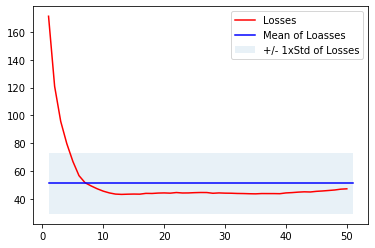

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,51),out_loss,'r')
plt.plot([1, 51],[mean_A, mean_A],'b')
plt.fill_between([1, 51],[mean_A-1*stdev_A, mean_A-1*stdev_A],[mean_A+1*stdev_A, mean_A+1*stdev_A], alpha=0.10)
plt.legend(('Losses','Mean of Loasses', '+/- 1xStd of Losses'))

## Conclusion

It is clear that the standardisation of the label variables has had a clear positive impact on the measured losses.
Although the average is lower, because the first few iterations had a rather large amount of noise, the standard deviation is a little larger
It is clear that the majority of the losses are below average (it was skewed by the beginning).

The final results are:

In [19]:
print("The mean of the mean squared errors is: : %.2f" % mean_A)
print("The standard deviation of the mean squared errors is: : %.2f" % stdev_A)

The mean of the mean squared errors is: : 51.42
The standard deviation of the mean squared errors is: : 21.98
